In [54]:
import numpy as np

In [55]:
dia_hebra = 0.27 # mm
# 
F_hebra = 3.241 # kg
F_hebra_kg = F_hebra
F_hebra = 9.81*F_hebra # N
A_hebra = np.pi*(dia_hebra/2)**2
sigma_hebra = F_hebra/A_hebra # MPa

F_trenzado = 172.667 # kg
F_trenzado_kg = F_trenzado
F_trenzado = 9.81*F_trenzado # N
dia_trenzado = 4 # mm

# 4 monofilamentos x 16 + 15 monofilamentos en alma
theta = 85 # grados
ctheta = np.sin(np.deg2rad(theta))
Nalma = 15
Atrenzado = (ctheta*16*4 + Nalma)*np.pi*(dia_hebra/2)**2 
sigma_trenzado = F_trenzado/Atrenzado # MPa

# homogenized 
Atrenzado_homogenized = np.pi*(dia_trenzado/2)**2
sigma_trenzado_homogenized = F_trenzado/Atrenzado_homogenized # MPa
# print with 2 decimals
print(f"sigma_trenzado = {sigma_trenzado:.2f} MPa")
print(f"sigma_hebra = {sigma_hebra:.2f} MPa")
print(f"sigma_trenzado_homogenized = {sigma_trenzado_homogenized:.2f} MPa")
# 
# ratio 
ratio = sigma_trenzado/sigma_hebra
print(f"ratio = {ratio:.3f}")

sigma_trenzado = 375.64 MPa
sigma_hebra = 555.30 MPa
sigma_trenzado_homogenized = 134.79 MPa
ratio = 0.676


In [56]:
from tools.step.runstep import runstep,address,lj
import os


In [57]:
import glob

In [58]:
files = glob.glob('output/*.json')

In [59]:
file = files[-4]

In [60]:
results = []
for file in files:

    try:
        id_sim = os.path.basename(file).replace('.json','')

        params_sim = lj(id_sim)
        params = lj(params_sim["dependencies"]["post_path"])

        steps = params["results"]["frd"]["steps"]
        step_str =  [ i[:7 ] for i in steps ]
        step_str = np.array(step_str)    
        step_str_uq = np.unique(step_str)

        indx = [ np.where(step_str == iuq )[-1][-1] for iuq in step_str_uq]


        sigma_max = [i["sigma_max"] for i in params["results"]["measurements"]]
        epsilon = [i["epsilon"] for i in params["results"]["measurements"]]
        Ftotal = [i["F_total"] for i in params["results"]["measurements"]]
        Ftrenzado = [i["Ftrenzado"] for i in params["results"]["measurements"]]
        Falma = [i["Falma"] for i in params["results"]["measurements"]]

        sigma_max = np.array(sigma_max)
        sigma_max = sigma_max[indx]

        epsilon = np.array(epsilon)
        epsilon = epsilon[indx]
        Ftotal = np.array(Ftotal)/9.81 # kg
        Ftotal = Ftotal[indx]

        Ftrenzado = np.array(Ftrenzado)/9.81 # kg
        Ftrenzado = Ftrenzado[indx]

        Falma = np.array(Falma)/9.81 # kg
        Falma = Falma[indx]

        step_str_uq = step_str[indx]

        angle = 85
        ctheta = np.sin(np.deg2rad(angle))
        Ftotal_correrted = Ftotal*((64*ctheta+Nalma)/64*ctheta)

        results.append({"id_sim":id_sim,
                        "Ftotal_correrted":Ftotal_correrted,
                        "step_str_uq":step_str_uq,"sigma_max":sigma_max,
                        "Ftrenzado":Ftrenzado,
                        "Falma":Falma,
                        "epsilon":epsilon,
                        "Ftotal":Ftotal})

    except Exception as e:
        print(e)
        print(file)
        pass


Simulation not found
output\2024-08-30__08-55-14__69218.json
Simulation not found
output\2024-08-30__09-08-30__98506.json
'Ftrenzado'
output\2024-08-30__09-27-38__56150.json
'Ftrenzado'
output\2024-08-30__11-06-00__65026.json
'Ftrenzado'
output\2024-08-30__12-42-12__65026.json
'Ftrenzado'
output\2024-08-30__22-32-19__65026.json
Simulation not found
output\2024-08-31__08-23-50__65026.json
Simulation not found
output\2024-08-31__17-02-56__96293.json
Simulation not found
output\2024-09-01__15-54-14__96293.json
Simulation not found
output\2024-09-10__16-39-35__78128.json
Simulation not found
output\2024-09-10__16-54-15__59821.json
'Ftrenzado'
output\2024-09-10__18-46-17__53932.json
Simulation not found
output\2024-09-11__08-45-05__88798.json
Simulation not found
output\2024-09-11__09-27-37__96293.json
Simulation not found
output\2024-09-11__14-05-30__96293.json
'Ftrenzado'
output\2024-09-11__15-42-25__31477.json
Simulation not found
output\2024-09-11__17-11-50__65026.json
'Ftrenzado'
outpu

In [61]:
from matplotlib import pyplot as plt
import numpy as np

In [62]:
len(results)

4

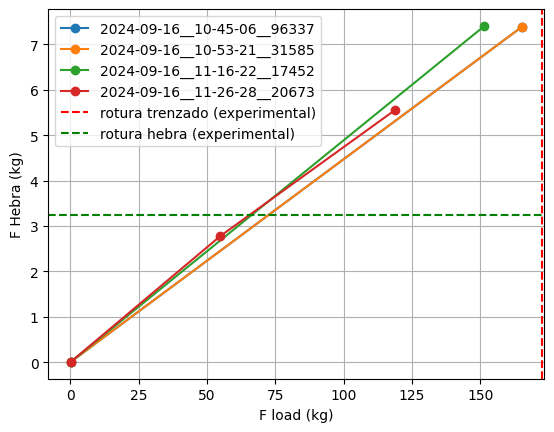

In [63]:
# linear regression

# sigma_max = a*sigma_apl + b
from scipy.stats import linregress

for r in results:

    id_sim = r["id_sim"]
    Ftotal_correrted = r["Ftotal_correrted"]
    step_str_uq = r["step_str_uq"]
    sigma_max = r["sigma_max"]
    epsilon = r["epsilon"]
    Ftotal = r["Ftotal"]


    # plt.plot(sigma_apl_fit,sigma_max_fit,label="fit",marker="none")

    Fmax =  sigma_max*A_hebra/9.81
    # plt.plot(Ftotal,Fmax,label="simulación",marker="o")
    label = f"{id_sim}"
    plt.plot(Ftotal_correrted,Fmax,label=label,marker="o")
    #horizontal line
plt.axvline(x=F_trenzado_kg, color='r', linestyle='--',label="rotura trenzado (experimental)")
#homogenized
# plt.axvline(x=sigma_trenzado_homogenized, color='b', linestyle='--',label="rotura trenzado (homogenized)")
#horizontal line
plt.axhline(y=F_hebra_kg, color='g', linestyle='--',label="rotura hebra (experimental)")
#
plt.ylabel("F Hebra (kg)")
plt.xlabel("F load (kg)")
plt.grid()
plt.legend()

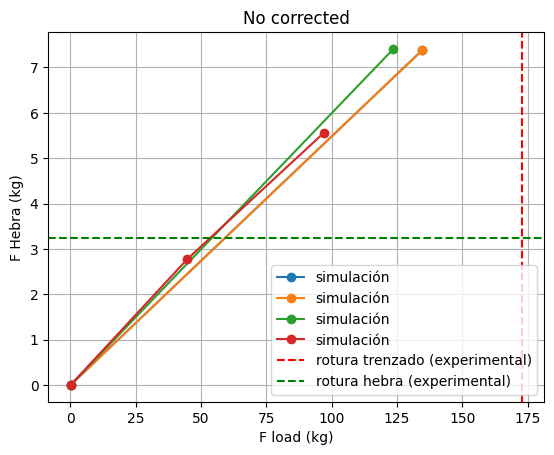

In [64]:
# linear regression

# sigma_max = a*sigma_apl + b
from scipy.stats import linregress

for r in results:

    id_sim = r["id_sim"]
    Ftotal_correrted = r["Ftotal_correrted"]
    step_str_uq = r["step_str_uq"]
    sigma_max = r["sigma_max"]
    epsilon = r["epsilon"]
    Ftotal = r["Ftotal"]

    # linear regression

    Fmax =  sigma_max*A_hebra/9.81
    plt.plot(Ftotal,Fmax,label="simulación",marker="o")
    label = f"{id_sim}"
    # plt.plot(Ftotal_correrted,Fmax,label=label,marker="o")
    #horizontal line
plt.axvline(x=F_trenzado_kg, color='r', linestyle='--',label="rotura trenzado (experimental)")
#homogenized
# plt.axvline(x=sigma_trenzado_homogenized, color='b', linestyle='--',label="rotura trenzado (homogenized)")
#horizontal line
plt.axhline(y=F_hebra_kg, color='g', linestyle='--',label="rotura hebra (experimental)")
#
plt.title("No corrected")
plt.ylabel("F Hebra (kg)")
plt.xlabel("F load (kg)")
plt.grid()
plt.legend()

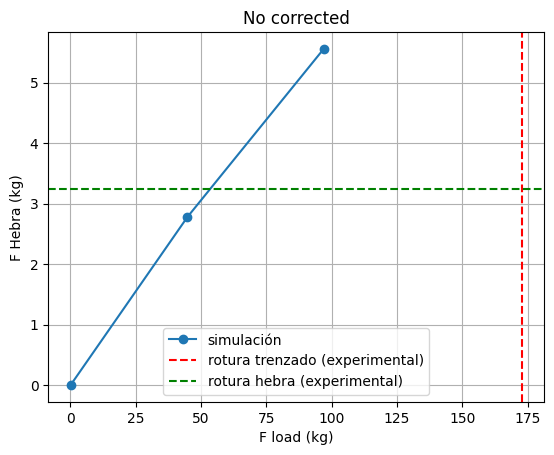

In [65]:
# linear regression

# sigma_max = a*sigma_apl + b
from scipy.stats import linregress

for r in results[-1:]:

    id_sim = r["id_sim"]
    Ftotal_correrted = r["Ftotal_correrted"]
    step_str_uq = r["step_str_uq"]
    sigma_max = r["sigma_max"]
    epsilon = r["epsilon"]
    Ftotal = r["Ftotal"]

    Fmax =  sigma_max*A_hebra/9.81
    plt.plot(Ftotal,Fmax,label="simulación",marker="o")
    label = f"{id_sim}"
    # plt.plot(Ftotal_correrted,Fmax,label=label,marker="o")
    #horizontal line
plt.axvline(x=F_trenzado_kg, color='r', linestyle='--',label="rotura trenzado (experimental)")
#homogenized
# plt.axvline(x=sigma_trenzado_homogenized, color='b', linestyle='--',label="rotura trenzado (homogenized)")
#horizontal line
plt.axhline(y=F_hebra_kg, color='g', linestyle='--',label="rotura hebra (experimental)")
#
plt.title("No corrected")
plt.ylabel("F Hebra (kg)")
plt.xlabel("F load (kg)")
plt.grid()
plt.legend()

In [66]:
results

[{'id_sim': '2024-09-16__10-45-06__96337',
  'Ftotal_correrted': array([1.40243569e-01, 1.65101961e+02]),
  'step_str_uq': array(['step_01', 'step_02'], dtype='<U7'),
  'sigma_max': array([1.26262770e+00, 1.26481003e+03]),
  'Ftrenzado': array([8.51527621e-03, 2.86335573e+01]),
  'Falma': array([1.05886433e-01, 1.06046034e+02]),
  'epsilon': array([4.24087061e-04, 4.24720473e-01]),
  'Ftotal': array([1.14401709e-01, 1.34679591e+02])},
 {'id_sim': '2024-09-16__10-53-21__31585',
  'Ftotal_correrted': array([1.40243569e-01, 1.65101961e+02]),
  'step_str_uq': array(['step_01', 'step_02'], dtype='<U7'),
  'sigma_max': array([1.26262770e+00, 1.26481003e+03]),
  'Ftrenzado': array([8.51527621e-03, 2.86335573e+01]),
  'Falma': array([1.05886433e-01, 1.06046034e+02]),
  'epsilon': array([4.24087061e-04, 4.24720473e-01]),
  'Ftotal': array([1.14401709e-01, 1.34679591e+02])},
 {'id_sim': '2024-09-16__11-16-22__17452',
  'Ftotal_correrted': array([1.32454900e-01, 1.51521688e+02]),
  'step_str_uq':

In [67]:
Ftotal = results[-1]["Ftotal"][-1]
Ftrenzado = results[-1]["Ftrenzado"][-1]
Falma = results[-1]["Falma"][-1]
print(f"Ftotal = {Ftotal} kg")
print(f"Ftrenzado = {Ftrenzado} kg")
print(f"Falma = {Falma} kg")


Ftotal = 96.9096219262996 kg
Ftrenzado = 17.088347500203728 kg
Falma = 79.82127442609585 kg


In [68]:
# Ratio 
ratio = Ftrenzado/Falma	

print(f"ratio = {ratio:.3f}")

ratio = 0.214
